<a href="https://colab.research.google.com/github/3bdo-Yahya/Image-Processing/blob/main/Section_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

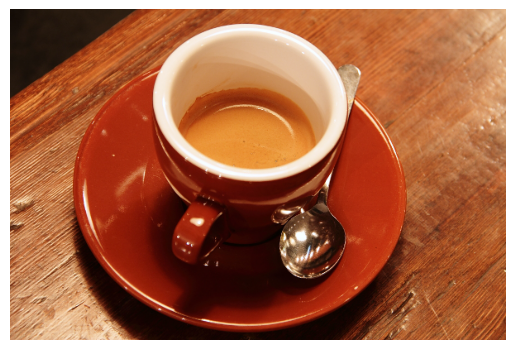

In [2]:
from skimage import data # to import sample images
image = data.coffee()  # ready sample (RGB numpy array)
plt.imshow(image); plt.axis('off')

# if you want to use your own image, uncomment the following line:
# image = cv2.imread('path_to_your_image.jpg')  # read image in ( BGR ) format

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

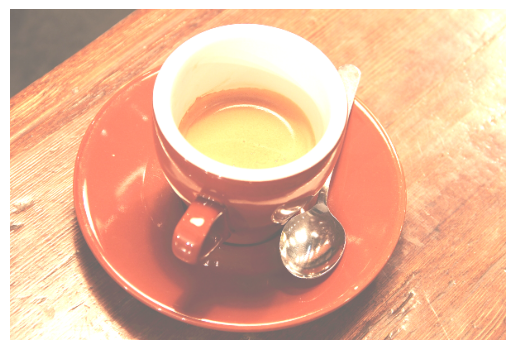

In [3]:
image_100 = cv2.add(image, 100)  # add 100 to each pixel value

# save the modified image but in BGR format because this function expects BGR format so we need to convert it before saving
# cv2.imwrite(image_100.jpg, image_100)

cv2.imwrite('image_100.jpg', cv2.cvtColor(image_100, cv2.COLOR_RGB2BGR))  # save the modified image
plt.imshow(image_100); plt.axis('off')

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

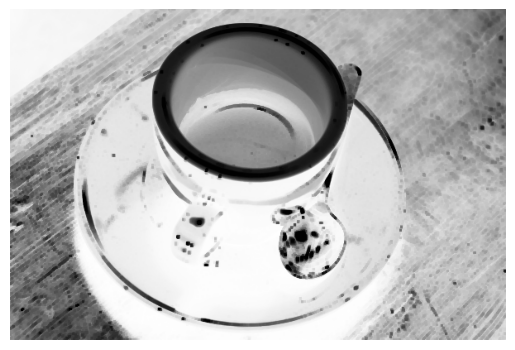

In [5]:
# Image dialation is a morphological operation that increases the white region in the image
# It is useful for joining broken parts of an object in an image
# It works by placing a kernel (a small matrix) over each pixel in the image and replacing the pixel value
# with the maximum value of the pixel values covered by the kernel

kernel = np.ones((3, 3), np.uint8)  # create a 3x3 kernel of ones
image_dilated = cv2.dilate(image_gray, kernel, iterations=1) # dilate the grayscale image
plt.imshow(image_dilated, cmap='Greys'); plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

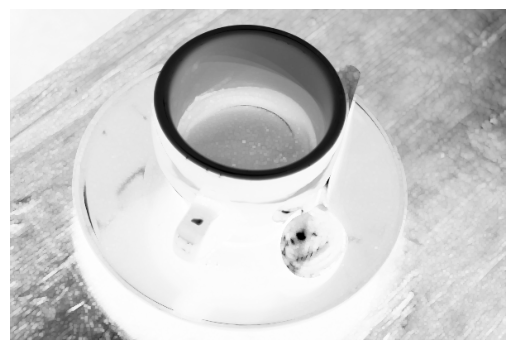

In [6]:
# Image erosion is a morphological operation that erodes away the boundaries of the foreground object
# It is useful for removing small white noises, detach two connected objects etc.
# It works by placing a kernel (a small matrix) over each pixel in the image and replacing the pixel value
# with the minimum value of the pixel values covered by the kernel

image_eroded = cv2.erode(image_gray, kernel, iterations=1)  # erode the grayscale image

plt.imshow(image_eroded, cmap='Greys'); plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

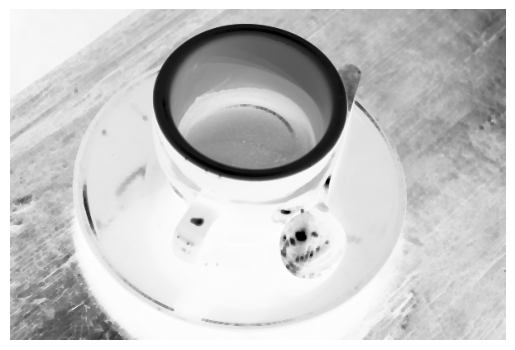

In [7]:
# Morphological opening is an operation that involves erosion followed by dilation
# It is useful for removing noise while keeping the shape and size of larger objects in the image
# It works by first eroding the image to remove small white noises, then dilating it to restore the original size of the objects
# This operation is particularly effective for removing small objects from an image while preserving the shape and size of larger objects

image_opened = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)  # opening operation
plt.imshow(image_opened, cmap='Greys'); plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

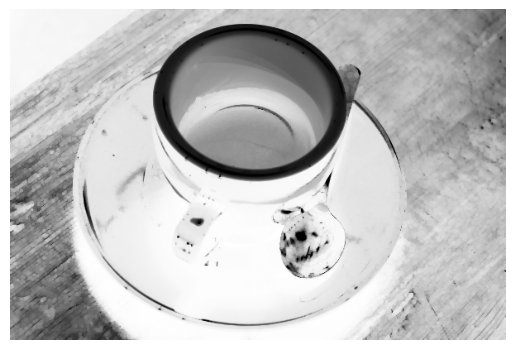

In [8]:
# Morphological closing is an operation that involves dilation followed by erosion
# It is useful for closing small holes inside the foreground objects, or small black points on the
# objects in the image
# It works by first dilating the image to close small holes, then eroding it to
# restore the original size of the objects
# This operation is particularly effective for closing small holes or gaps in the foreground objects

image_closed = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)  # closing operation
plt.imshow(image_closed, cmap='Greys'); plt.axis('off')

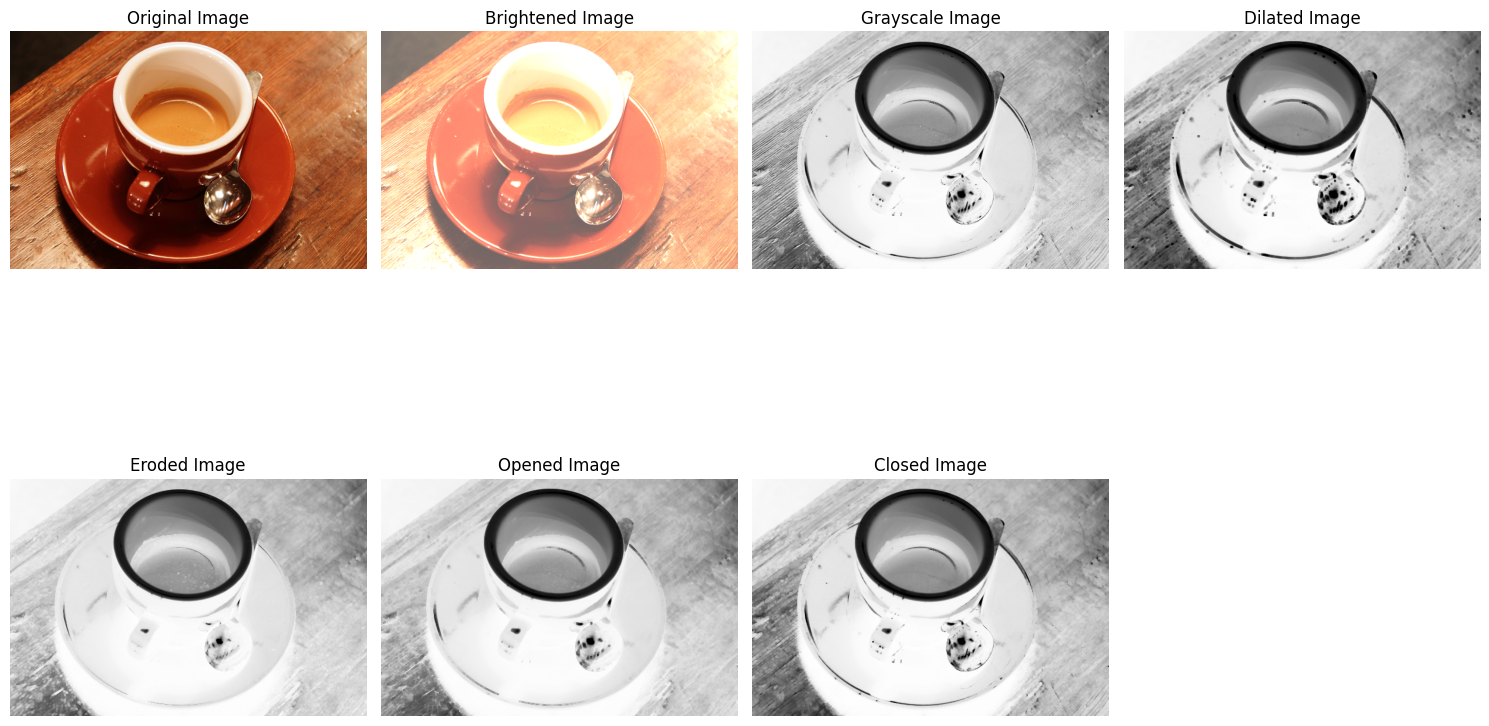

In [9]:
Images = [image, image_100, image_gray, image_dilated, image_eroded, image_opened, image_closed]
Titles = ['Original Image', 'Brightened Image', 'Grayscale Image', 'Dilated Image', 'Eroded Image', 'Opened Image', 'Closed Image']

plt.figure(figsize=(15,10))
for i in range(len(Images)):
    plt.subplot(2, 4, i+1)
    if len(Images[i].shape) == 2:  # grayscale image
        plt.imshow(Images[i], cmap='Greys')
    else:
        plt.imshow(Images[i])
    plt.title(Titles[i])
    plt.axis('off')

plt.tight_layout(); plt.show()

In [10]:
image_gray_2 = image_gray
edges = cv2.Canny(image_gray_2, 100, 200)  # Canny edge detection

# Canny edge detection is a multi-stage algorithm to detect a wide range of edges in images
# It involves the following steps:
# 1. Noise reduction using Gaussian filter
# 2. Finding intensity gradient of the image
# 3. Non-maximum suppression to get rid of spurious response to edge detection
# 4. Double thresholding to determine potential edges
# 5. Edge tracking by hysteresis to finalize the detection of edges

# The result is a binary image showing the detected edges
# The two threshold values (100 and 200 in this case) are used in the double thresholding step
# They help to identify strong and weak edges in the image
# Strong edges are those with intensity gradient above the high threshold (200)
# Weak edges are those with intensity gradient between the low threshold (100) and high threshold (200)

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

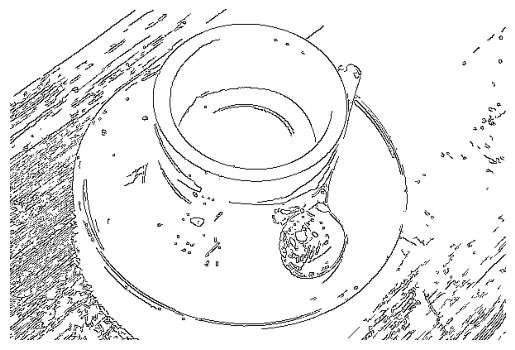

In [11]:
plt.imshow(edges, cmap='Greys'); plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

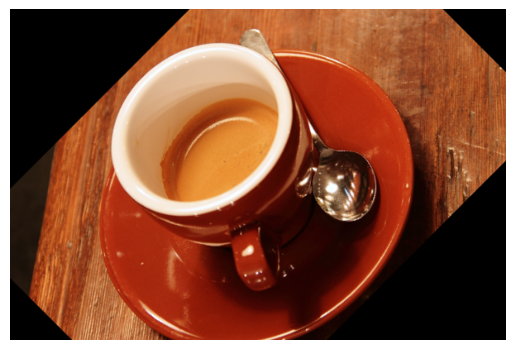

In [12]:
# Image rotation:
# it involves rotating the image around a specified point (usually the center)
# by a certain angle and scaling factor using an affine transformation matrix

h, w = image.shape[:2] # height and width of the image
ctr = (w // 2, h // 2)  # center of the image
ang = 45  # rotation angle in degrees
scl = 1.0  # scale factor

M = cv2.getRotationMatrix2D(ctr, ang, scl)  # rotation matrix for rotating the image

rotated_image = cv2.warpAffine(image, M, (w, h))  # rotate the image using the rotation matrix

plt.imshow(rotated_image); plt.axis('off')